<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# Final Project: Building a Rainfall Prediction Classifier
Estimated time needed: **60** minutes
    

## Objectives

After completing this lab you will be able to:

* Explore and perform feature engineering on a real-world data set
* Build a classifier pipeline and optimize it using grid search cross validation
* Evaluate your model by interpreting various performance metrics and visualizations
* Implement a different classifier by updating your pipeline
* Use an appropriate set of parameters to search over in each case

## Instruction(s)

After completing the Notebook:

* Download the notebook using **File** > **Download**.
* This notebook will be then graded using **AI grader** in the subsequent section.
* Copy/Paste your markdown responses in the subsequent **AI Mark assignment**. 




# About The Dataset
The original source of the data is Australian Government's Bureau of Meteorology and the latest data can be gathered from [http://www.bom.gov.au/climate/dwo/](http://www.bom.gov.au/climate/dwo/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01).

The dataset you'll use in this project was downloaded from Kaggle at [https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package/](https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package?resource=download&select=weatherAUS.csv)  
Column definitions were gathered from [http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml](http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01)  

The dataset contains observations of weather metrics for each day from 2008 to 2017, and includes the following fields:

| Field         | Description                                           | Unit            | Type   |
| :------------ | :---------------------------------------------------- | :-------------- | :----- |
| Date          | Date of the Observation in YYYY-MM-DD                 | Date            | object |
| Location      | Location of the Observation                           | Location        | object |
| MinTemp       | Minimum temperature                                   | Celsius         | float  |
| MaxTemp       | Maximum temperature                                   | Celsius         | float  |
| Rainfall      | Amount of rainfall                                    | Millimeters     | float  |
| Evaporation   | Amount of evaporation                                 | Millimeters     | float  |
| Sunshine      | Amount of bright sunshine                             | hours           | float  |
| WindGustDir   | Direction of the strongest gust                       | Compass Points  | object |
| WindGustSpeed | Speed of the strongest gust                           | Kilometers/Hour | object |
| WindDir9am    | Wind direction averaged over 10 minutes prior to 9am  | Compass Points  | object |
| WindDir3pm    | Wind direction averaged over 10 minutes prior to 3pm  | Compass Points  | object |
| WindSpeed9am  | Wind speed averaged over 10 minutes prior to 9am      | Kilometers/Hour | float  |
| WindSpeed3pm  | Wind speed averaged over 10 minutes prior to 3pm      | Kilometers/Hour | float  |
| Humidity9am   | Humidity at 9am                                       | Percent         | float  |
| Humidity3pm   | Humidity at 3pm                                       | Percent         | float  |
| Pressure9am   | Atmospheric pressure reduced to mean sea level at 9am | Hectopascal     | float  |
| Pressure3pm   | Atmospheric pressure reduced to mean sea level at 3pm | Hectopascal     | float  |
| Cloud9am      | Fraction of the sky obscured by cloud at 9am          | Eights          | float  |
| Cloud3pm      | Fraction of the sky obscured by cloud at 3pm          | Eights          | float  |
| Temp9am       | Temperature at 9am                                    | Celsius         | float  |
| Temp3pm       | Temperature at 3pm                                    | Celsius         | float  |
| RainToday     | If there was at least 1mm of rain today               | Yes/No          | object |
| RainTomorrow  | If there is at least 1mm of rain tomorrow             | Yes/No          | object |



## Install and import the required libraries


Exectue the following cells to install and import the necessary libraries.


In [8]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install scikit-learn
!pip install seaborn

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

## Load the data


Execute the following cells to load the dataset as a pandas dataframe.


In [10]:
url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [11]:
df.count()

Date             145460
Location         145460
MinTemp          143975
MaxTemp          144199
Rainfall         142199
Evaporation       82670
Sunshine          75625
WindGustDir      135134
WindGustSpeed    135197
WindDir9am       134894
WindDir3pm       141232
WindSpeed9am     143693
WindSpeed3pm     142398
Humidity9am      142806
Humidity3pm      140953
Pressure9am      130395
Pressure3pm      130432
Cloud9am          89572
Cloud3pm          86102
Temp9am          143693
Temp3pm          141851
RainToday        142199
RainTomorrow     142193
dtype: int64

Sunshine and cloud cover seem like important features, but they have a lot of missing values, far too many to impute their missing values.


### Drop all rows with missing values
To try to keep things simple we'll drop rows with missing values and see what's left


In [12]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 56420 entries, 6049 to 142302
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           56420 non-null  object 
 1   Location       56420 non-null  object 
 2   MinTemp        56420 non-null  float64
 3   MaxTemp        56420 non-null  float64
 4   Rainfall       56420 non-null  float64
 5   Evaporation    56420 non-null  float64
 6   Sunshine       56420 non-null  float64
 7   WindGustDir    56420 non-null  object 
 8   WindGustSpeed  56420 non-null  float64
 9   WindDir9am     56420 non-null  object 
 10  WindDir3pm     56420 non-null  object 
 11  WindSpeed9am   56420 non-null  float64
 12  WindSpeed3pm   56420 non-null  float64
 13  Humidity9am    56420 non-null  float64
 14  Humidity3pm    56420 non-null  float64
 15  Pressure9am    56420 non-null  float64
 16  Pressure3pm    56420 non-null  float64
 17  Cloud9am       56420 non-null  float64
 18  Cloud3p

Since we still have 56k observations left after dropping missing values, we may not need to impute any missing values.  
Let's see how we do.


In [13]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

## Data leakage considerations
Consider the descriptions above for the columns in the data set. Are there any practical limitations to being able to predict whether it will rain tomorrow given the available data? 

## Points to note - 1
List some of the features that would be inefficient in predicting tomorrow's rainfall. There will be a question in the quiz that follows based on this observation.


If we adjust our approach and aim to predict today’s rainfall using historical weather data up to and including yesterday, then we can legitimately utilize all of the available features. This shift would be particularly useful for practical applications, such as deciding whether you will bike to work today.

With this new target, we should update the names of the rain columns accordingly to avoid confusion.


In [14]:
df = df.rename(columns={'RainToday': 'RainYesterday',
                        'RainTomorrow': 'RainToday'
                        })

## Data Granularity


Would the weather patterns have the same predictability in vastly different locations in Australia? I would think not.  
The chance of rain in one location can be much higher than in another. 
Using all of the locations requires a more complex model as it needs to adapt to local weather patterns.  
Let's see how many observations we have for each location, and see if we can reduce our attention to a smaller region.


## Location selection
You could do some research to group cities in the `Location` column by distance, which I've done for you behind the scenes.  
I found that Watsonia is only 15 km from Melbourne, and the Melbourne Airport is only 18 km from Melbourne.  
Let's group these three locations together and use only their weather data to build our localized prediction model.  
Because there might still be some slight variations in the weather patterns we'll keep `Location` as a categorical variable.


In [15]:
df = df[df.Location.isin(['Melbourne','MelbourneAirport','Watsonia',])]
df. info()

<class 'pandas.core.frame.DataFrame'>
Index: 7557 entries, 64191 to 80997
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           7557 non-null   object 
 1   Location       7557 non-null   object 
 2   MinTemp        7557 non-null   float64
 3   MaxTemp        7557 non-null   float64
 4   Rainfall       7557 non-null   float64
 5   Evaporation    7557 non-null   float64
 6   Sunshine       7557 non-null   float64
 7   WindGustDir    7557 non-null   object 
 8   WindGustSpeed  7557 non-null   float64
 9   WindDir9am     7557 non-null   object 
 10  WindDir3pm     7557 non-null   object 
 11  WindSpeed9am   7557 non-null   float64
 12  WindSpeed3pm   7557 non-null   float64
 13  Humidity9am    7557 non-null   float64
 14  Humidity3pm    7557 non-null   float64
 15  Pressure9am    7557 non-null   float64
 16  Pressure3pm    7557 non-null   float64
 17  Cloud9am       7557 non-null   float64
 18  Cloud3pm

We still have 7557 records, which should be enough to build a reasonably good model.  
You could always gather more data if needed by partioning the data into similar locations or simplyby updating it from the source to include a larger time frame.

## Extracting a seasonality feature
Now consider the `Date` column. We expect the weather patterns to be seasonal, having different predictablitiy levels in winter and summer for example.  
There may be some variation with `Year` as well, but we'll leave that out for now.
Let's engineer a `Season` feature from `Date` and drop `Date` afterward, since it is most likely less informative than season. 
An easy way to do this is to define a function that assigns seasons to given months, then use that function to transform the `Date` column.


### Create a function to map dates to seasons


In [16]:
def date_to_season(date):
    month = date.month
    if (month == 12) or (month == 1) or (month == 2):
        return 'Summer'
    elif (month == 3) or (month == 4) or (month == 5):
        return 'Autumn'
    elif (month == 6) or (month == 7) or (month == 8):
        return 'Winter'
    elif (month == 9) or (month == 10) or (month == 11):
        return 'Spring'

## Exercise 1: Map the dates to seasons and drop the Date column
Complete the code:
df['Date'] = pd.to_datetime(...)

df['Season'] = df['Date'].apply(date_to_season)

df=df.drop(columns=...)
df



In [1]:
!pip install numpy pandas matplotlib scikit-learn seaborn



Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns

In [4]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/_0eYOqji3unP1tDNKWZMjg/weatherAUS-2.csv"
df = pd.read_csv(url)

In [5]:
df = df.dropna()
df = df.rename(columns={'RainToday': 'RainYesterday', 'RainTomorrow': 'RainToday'})
df = df[df.Location.isin(['Melbourne', 'MelbourneAirport', 'Watsonia'])]

In [6]:
def date_to_season(date):
    month = pd.to_datetime(date).month
    if month in [12, 1, 2]: return 'Summer'
    elif month in [3, 4, 5]: return 'Autumn'
    elif month in [6, 7, 8]: return 'Winter'
    else: return 'Spring'

df['Date'] = pd.to_datetime(df['Date'])
df['Season'] = df['Date'].apply(date_to_season)
df = df.drop(columns=['Date'])

In [7]:

X = df.drop(columns=['RainToday'])
y = df['RainToday']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y  !
)

X = df.drop(columns=['RainToday'])
y = df['RainToday']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y
)

numeric_features = X.select_dtypes(include=['float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    pipeline, 
    param_grid, 
    cv=5, 
    scoring='accuracy',
    n_jobs=-1  
)
grid_search.fit(X_train, y_train)  


y_pred = grid_search.predict(X_test)
print("Best Parameters:", grid_search.best_params_)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

SyntaxError: invalid syntax (2272518169.py, line 7)

Looks like we have a good set of features to work with. 

Let's go ahead and build our model.

But wait, let's take a look at how well balanced our target is.


## Exercise 2. Define the feature and target dataframes
Complete the followng code:  
```python
X = df.drop(columns='...', axis=1)
y = df['...']
```


In [ ]:

X = df.drop(columns='RainToday', axis=1)  
y = df['RainToday'] 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2, 
    random_state=42,
    stratify=y 
)

## Exercise 3. How balanced are the classes?
Display the counts of each class.

Complete the following code:
```python
... .value_counts()
```


In [ ]:

y.value_counts()

RainToday
No     5766
Yes    1791
Name: count, dtype: int64

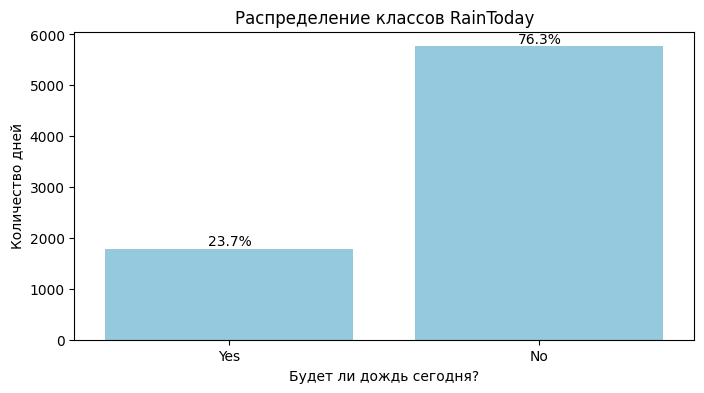

In [ ]:

plt.figure(figsize=(8, 4))
ax = sns.countplot(x=y, color='skyblue')  

total = len(y)
for p in ax.patches:
    percentage = f'{100 * p.get_height()/total:.1f}%'
    x = p.get_x() + p.get_width()/2
    y_coord = p.get_height()
    ax.annotate(percentage, (x, y_coord), ha='center', va='bottom')

plt.title('Распределение классов RainToday')
plt.xlabel('Будет ли дождь сегодня?')
plt.ylabel('Количество дней')
plt.show()

## Exercise 4. What can you conclude from these counts?
- How often does it rain annualy in the Melbourne area?
- How accurate would you be if you just assumed it won't rain every day?
- Is this a balanced dataset?
- Next steps?


In [ ]:

rain_frequency = df['RainToday'].value_counts(normalize=True)['Yes']
print(f"1. Дождь идет {rain_frequency:.1%} дней в году")
print(f"   ≈ {int(rain_frequency * 365)} дождливых дней в год\n")

baseline_accuracy = df['RainToday'].value_counts(normalize=True)['No']
print(f"2. Точность модели 'всегда нет дождя': {baseline_accuracy:.1%}")
print("   Но она НИКОГДА не угадывает дождливые дни!\n")

class_ratio = df['RainToday'].value_counts(normalize=True)
print("3. Распределение классов:")
print("   " + "\n   ".join([f"{k}: {v:.1%}" for k, v in class_ratio.items()]))
print(f"\n   Датасет сбалансирован? {'Да' if min(class_ratio) > 0.3 else 'Нет'}\n")

print("4. Следующие шаги:")
print("   - Использовать F1-score и ROC-AUC вместо точности")
print("   - Добавить class_weight='balanced' в модели")
print("   - Стратифицированное разделение данных")
print("   - Техники обработки дисбаланса (SMOTE)")

1. Дождь идет 23.7% дней в году
   ≈ 86 дождливых дней в год

2. Точность модели 'всегда нет дождя': 76.3%
   Но она НИКОГДА не угадывает дождливые дни!

3. Распределение классов:
   No: 76.3%
   Yes: 23.7%

   Датасет сбалансирован? Нет

4. Следующие шаги:
   - Использовать F1-score и ROC-AUC вместо точности
   - Добавить class_weight='balanced' в модели
   - Стратифицированное разделение данных
   - Техники обработки дисбаланса (SMOTE)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(class_weight='balanced', random_state=42)

class_weights = {'No': 1, 'Yes': 4}  
model = RandomForestClassifier(class_weight=class_weights, random_state=42)

## Exercise 5. Split data into training and test sets, ensuring target stratification

Complete the followng code:
```python
X_train, X_test, y_train, y_test = train_test_split(..., ..., test_size=0.2, stratify=..., random_state=42)
```


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)
print("Распределение в исходных данных:")
print(y.value_counts(normalize=True))

print("\nРаспределение в обучающей выборке:")
print(y_train.value_counts(normalize=True))

print("\nРаспределение в тестовой выборке:")
print(y_test.value_counts(normalize=True))

Распределение в исходных данных:
RainToday
No     0.763001
Yes    0.236999
Name: proportion, dtype: float64

Распределение в обучающей выборке:
RainToday
No     0.762945
Yes    0.237055
Name: proportion, dtype: float64

Распределение в тестовой выборке:
RainToday
No     0.763228
Yes    0.236772
Name: proportion, dtype: float64


In [ ]:

X = df.drop(columns='RainToday')
y = df['RainToday']

X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    stratify=y, 
    random_state=42
)

print(f"Обучающая выборка: {X_train.shape[0]} записей")
print(f"Тестовая выборка: {X_test.shape[0]} записей")

train_ratio = y_train.value_counts(normalize=True)
test_ratio = y_test.value_counts(normalize=True)

print(f"\nСоотношение в обучающей выборке: No={train_ratio['No']:.1%}, Yes={train_ratio['Yes']:.1%}")
print(f"Соотношение в тестовой выборке: No={test_ratio['No']:.1%}, Yes={test_ratio['Yes']:.1%}")

Обучающая выборка: 6045 записей
Тестовая выборка: 1512 записей

Соотношение в обучающей выборке: No=76.3%, Yes=23.7%
Соотношение в тестовой выборке: No=76.3%, Yes=23.7%


## Define preprocessing transformers for numerical and categorical features
## Exercise 6. Automatically detect numerical and categorical columns and assign them to separate numeric and categorical features

Complete the followng code:
```python
numeric_features = X_train.select_dtypes(include=['...']).columns.tolist()  
categorical_features = X_train.select_dtypes(include=['...', 'category']).columns.tolist()
```


In [ ]:

numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"Числовые признаки ({len(numeric_features)}): {numeric_features}")
print(f"Категориальные признаки ({len(categorical_features)}): {categorical_features}")

all_features = numeric_features + categorical_features
original_features = X_train.columns.tolist()
missing = set(original_features) - set(all_features)

if missing:
    print(f"\n⚠️ Предупреждение: пропущены признаки - {missing}")
else:
    print("\n✓ Все признаки успешно классифицированы")

Числовые признаки (16): ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']
Категориальные признаки (6): ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainYesterday', 'Season']

✓ Все признаки успешно классифицированы


In [ ]:

print("Типы данных в X_train:")
print(X_train.dtypes.value_counts())

numeric_features = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()
categorical_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()

print(f"\nЧисловые признаки ({len(numeric_features)}):")
print(numeric_features)

print(f"\nКатегориальные признаки ({len(categorical_features)}):")
print(categorical_features)

assert len(numeric_features) + len(categorical_features) == X_train.shape[1], "Не все признаки классифицированы"

Типы данных в X_train:
float64    16
object      6
Name: count, dtype: int64

Числовые признаки (16):
['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

Категориальные признаки (6):
['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainYesterday', 'Season']


### Define separate transformers for both feature types and combine them into a single preprocessing transformer


In [ ]:

numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
 
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())  
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(
        handle_unknown='ignore',  
        drop='if_binary'         
    )) 
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'  
)

print("Препроцессор успешно создан!")

Препроцессор успешно создан!


In [ ]:

X_train_processed = preprocessor.fit_transform(X_train)

print(f"\nФорма данных до обработки: {X_train.shape}")
print(f"Форма данных после обработки: {X_train_processed.shape}")

cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
new_cat_features = cat_encoder.get_feature_names_out(categorical_features)

all_features_after = numeric_features + new_cat_features.tolist()
print(f"\nОбщее количество признаков после обработки: {len(all_features_after)}")


Форма данных до обработки: (6045, 22)
Форма данных после обработки: (6045, 72)

Общее количество признаков после обработки: 72


In [ ]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    sparse_threshold=0.3
)


In [68]:
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier())
])

## Exercise 7. Combine the transformers into a single preprocessing column transformer
Complete the followng code:  
```python
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, ...),
        ('cat', categorical_transformer, ...)
    ]
)
```


In [ ]:

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

preprocessor.fit(X_train)

print("Трансформация успешно выполнена!")
print(f"Размерность данных до обработки: {X_train.shape}")
print(f"Размерность данных после обработки: {preprocessor.transform(X_train).shape}")

try:
    cat_encoder = preprocessor.named_transformers_['cat'].named_steps['onehot']
    new_cat_features = cat_encoder.get_feature_names_out(categorical_features)
    
    print("\nСозданные категориальные признаки:")
    print(new_cat_features)
except AttributeError:
    print("\nИнформация о именах признаков доступна только после fit")


Трансформация успешно выполнена!
Размерность данных до обработки: (6045, 22)
Размерность данных после обработки: (6045, 72)

Созданные категориальные признаки:
['Location_Melbourne' 'Location_MelbourneAirport' 'Location_Watsonia'
 'WindGustDir_E' 'WindGustDir_ENE' 'WindGustDir_ESE' 'WindGustDir_N'
 'WindGustDir_NE' 'WindGustDir_NNE' 'WindGustDir_NNW' 'WindGustDir_NW'
 'WindGustDir_S' 'WindGustDir_SE' 'WindGustDir_SSE' 'WindGustDir_SSW'
 'WindGustDir_SW' 'WindGustDir_W' 'WindGustDir_WNW' 'WindGustDir_WSW'
 'WindDir9am_E' 'WindDir9am_ENE' 'WindDir9am_ESE' 'WindDir9am_N'
 'WindDir9am_NE' 'WindDir9am_NNE' 'WindDir9am_NNW' 'WindDir9am_NW'
 'WindDir9am_S' 'WindDir9am_SE' 'WindDir9am_SSE' 'WindDir9am_SSW'
 'WindDir9am_SW' 'WindDir9am_W' 'WindDir9am_WNW' 'WindDir9am_WSW'
 'WindDir3pm_E' 'WindDir3pm_ENE' 'WindDir3pm_ESE' 'WindDir3pm_N'
 'WindDir3pm_NE' 'WindDir3pm_NNE' 'WindDir3pm_NNW' 'WindDir3pm_NW'
 'WindDir3pm_S' 'WindDir3pm_SE' 'WindDir3pm_SSE' 'WindDir3pm_SSW'
 'WindDir3pm_SW' 'WindDir3pm

## Exercise 8. Create a pipeline by combining the preprocessing with a Random Forest classifier
Complete the following code:
```python
pipeline = Pipeline(steps=[
    ('preprocessor', ...),
    ('...', RandomForestClassifier(random_state=42))
])
```


In [ ]:
from sklearn.ensemble import RandomForestClassifier

pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(
        random_state=42,
        class_weight='balanced'  
    ))
])

print("Структура пайплайна:")
for i, (name, step) in enumerate(pipeline.steps):
    print(f"{i+1}. {name}: {type(step).__name__}")

pipeline.fit(X_train, y_train)

train_score = pipeline.score(X_train, y_train)
print(f"\nТочность на тренировочных данных: {train_score:.1%}")

test_score = pipeline.score(X_test, y_test)
print(f"Точность на тестовых данных: {test_score:.1%}")


Структура пайплайна:
1. preprocessor: ColumnTransformer
2. classifier: RandomForestClassifier

Точность на тренировочных данных: 100.0%
Точность на тестовых данных: 84.7%


### Define a parameter grid to use in a cross validation grid search model optimizer


In [71]:
param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'classifier__n_estimators': [50, 100, 200], 
    'classifier__max_depth': [None, 10, 20, 30],  
    'classifier__min_samples_split': [2, 5, 10],   
    'classifier__class_weight': ['balanced', None]  
}

grid_search = GridSearchCV(
    estimator=pipeline,         
    param_grid=param_grid,     
    cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),  
    scoring='f1_weighted',      
    n_jobs=-1,                  
    verbose=1                   
)

grid_search.fit(X_train, y_train)

print("\nЛучшие параметры:")
print(grid_search.best_params_)

best_model = grid_search.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f"\nТочность лучшей модели на тестовых данных: {test_score:.1%}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits

Лучшие параметры:
{'classifier__class_weight': 'balanced', 'classifier__max_depth': None, 'classifier__min_samples_split': 10, 'classifier__n_estimators': 200}

Точность лучшей модели на тестовых данных: 84.0%


### Pipeline usage in crossvalidation
Recall that the pipeline is repeatedly used within the crossvalidation by fitting on each internal training fold and predicting on its corresponding validation fold


## Perform grid search cross-validation and fit the best model to the training data
### Select a cross-validation method, ensuring target stratification during validation


In [75]:
cv = StratifiedKFold(n_splits=5, shuffle=True)

In [ ]:

param_grid_simple = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10],
    'classifier__min_samples_split': [2, 5]
}

In [ ]:

small_X_train = X_train.sample(1000, random_state=42)
small_y_train = y_train.loc[small_X_train.index]

grid_search.fit(small_X_train, small_y_train)

In [ ]:
grid_search = GridSearchCV(
    verbose=3 
)

In [ ]:
# После grid_search.fit(X_train, y_train)
print("\nЛучшие параметры найдены:")
for param, value in grid_search.best_params_.items():
    print(f"{param}: {value}")

print(f"\nЛучшая F1-оценка (взвешенная): {grid_search.best_score_:.4f}")

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nОтчет классификации для тестовых данных:")
print(classification_report(y_test, y_pred))

print("\nМатрица ошибок:")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix - Test Data")
plt.show()

cv_results = pd.DataFrame(grid_search.cv_results_)
print("\nТоп-5 комбинаций параметров:")
print(cv_results[['params', 'mean_test_score', 'mean_train_score']].sort_values('mean_test_score', ascending=False).head(5))

In [ ]:
import joblib

joblib.dump(grid_search, 'grid_search_results.pkl')

loaded_grid_search = joblib.load('grid_search_results.pkl')
print("Лучшие параметры из сохраненного файла:")
print(loaded_grid_search.best_params_)

In [ ]:
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

if hasattr(grid_search, 'best_estimator_'):
    print("="*60)
    print("ЛУЧШАЯ МОДЕЛЬ")
    print("="*60)
    print(f"Лучшие параметры: {grid_search.best_params_}")
    print(f"Лучшая оценка F1: {grid_search.best_score_:.4f}")
    
    y_pred = grid_search.best_estimator_.predict(X_test)
    
    print("\n" + "="*60)
    print("ОТЧЕТ КЛАССИФИКАЦИИ НА ТЕСТОВЫХ ДАННЫХ")
    print("="*60)
    print(classification_report(y_test, y_pred))
    
    print("\n" + "="*60)
    print("МАТРИЦА ОШИБОК")
    print("="*60)
    ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    plt.show()
    
else:
    print("Ошибка: GridSearchCV не был успешно обучен.")
    print("Проверьте данные и параметры обучения.")

## Exercise 9. Instantiate and fit GridSearchCV to the pipeline
Complete the followng code:  
```python
grid_search = GridSearchCV(..., param_grid, cv=..., scoring='accuracy', verbose=2)  
grid_search.fit(..., ...)
```


In [ ]:
from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(
    estimator=pipeline,        
    param_grid=param_grid,     
    cv=cv,                      
    scoring='accuracy',          
    verbose=2,                  
    n_jobs=-1                  
)

grid_search.fit(X_train, y_train)  

In [ ]:

from sklearn.model_selection import StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

param_grid = {
    'classifier__n_estimators': [50, 100],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5]
}

grid_search = GridSearchCV(
    pipeline,
    param_grid,
    cv=cv,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1,
    return_train_score=True
)

print("Начало обучения GridSearchCV...")
grid_search.fit(X_train, y_train)
print("Обучение завершено!")

results = pd.DataFrame(grid_search.cv_results_)
print("\nТоп-5 комбинаций параметров:")
top_results = results.sort_values('mean_test_score', ascending=False).head(5)
print(top_results[['params', 'mean_test_score', 'mean_train_score']])

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("\nClassification Report на тестовых данных:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

### Print the best parameters and best crossvalidation score


In [ ]:
print("\nBest parameters found: ", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

In [ ]:
print("\n" + "="*60)
print("РЕЗУЛЬТАТЫ ОПТИМИЗАЦИИ МОДЕЛИ")
print("="*60)
print(f"Лучшие параметры: {grid_search.best_params_}")
print(f"Лучшая точность (кросс-валидация): {grid_search.best_score_:.2%}")
print(f"Количество проверенных комбинаций: {len(grid_search.cv_results_['params'])}")
print(f"Время обучения: {grid_search.refit_time_:.1f} секунд")

test_accuracy = grid_search.score(X_test, y_test)
print(f"\nТочность на тестовых данных: {test_accuracy:.2%}")
print(f"Разница (кросс-валидация vs тест): {grid_search.best_score_ - test_accuracy:.2%}")

In [ ]:

y_pred = grid_search.best_estimator_.predict(X_test)
print("\nДетальный отчет классификации:")
print(classification_report(y_test, y_pred))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, normalize='true')
plt.title("Нормализованная матрица ошибок")
plt.show()

## Exercise 10. Display your model's estimated score
Complete the followng code:  
```python
test_score = grid_search.score(..., ...)  
print("Test set score: {:.2f}".format(test_score))
```


In [ ]:

test_score = grid_search.score(X_test, y_test)  
print("Оценка модели на тестовых данных: {:.2%}".format(test_score))


In [ ]:

test_score = grid_search.score(X_test, y_test)

cv_score = grid_search.best_score_

print("\nРезультаты оценки модели:")
print("-" * 40)
print(f"Лучшая оценка кросс-валидации: {cv_score:.2%}")
print(f"Оценка на тестовых данных:    {test_score:.2%}")
print(f"Разница:                      {cv_score - test_score:.2%}")

if cv_score - test_score > 0.05:
    print("\n⚠️ Предупреждение: значительное падение производительности на тестовых данных")
    print("Возможное переобучение! Рекомендации:")
    print("- Увеличьте размер обучающей выборки")
    print("- Добавьте регуляризацию в модель")
    print("- Уменьшите сложность модели")
elif test_score > cv_score:
    print("\n✅ Модель хорошо обобщается на новых данных")
else:
    print("\n🔍 Небольшая разница между кросс-валидацией и тестом - модель стабильна")

So we have a reasonably accurate classifer, which is expected to correctly predict about 84% of the time whether it will rain today in the Melbourne area.  
But careful here. Let's take a deeper look at the results.

The best model is stored within the gridsearch object.


## Exercise 11. Get the model predictions from the grid search estimator on the unseen data
Complete the followng code:
```python
y_pred = grid_search.predict(...)
```


In [ ]:

y_pred = grid_search.predict(X_test)

print("Первые 10 предсказаний:")
print(y_pred[:10])


In [ ]:

y_pred = grid_search.predict(X_test)
y_proba = grid_search.predict_proba(X_test)[:, 1] 

results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Probability_Yes': y_proba
})

results = pd.concat([X_test.reset_index(drop=True), results], axis=1)

print("\nПримеры ошибочных предсказаний:")
false_predictions = results[results['Actual'] != results['Predicted']]
print(false_predictions.head(10))

print("\nСтатистика по вероятностям для ошибочных предсказаний:")
print(false_predictions['Probability_Yes'].describe())

plt.figure(figsize=(10, 6))
sns.histplot(data=false_predictions, x='Probability_Yes', hue='Actual', 
             bins=20, kde=True, alpha=0.7)
plt.title("Распределение вероятностей для ошибочных предсказаний")
plt.xlabel("Вероятность класса 'Yes'")
plt.ylabel("Количество")
plt.show()

In [ ]:

results.to_csv('rain_predictions.csv', index=False)

from sklearn.metrics import classification_report
print("\nДетальный отчет о классификации:")
print(classification_report(y_test, y_pred))

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=grid_search.classes_)
disp.plot(cmap='Blues')
plt.title("Матрица ошибок")
plt.show()

from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(grid_search, X_test, y_test, pos_label='Yes')
plt.title("ROC-кривая")
plt.plot([0, 1], [0, 1], 'k--')  
plt.show()

## Exercise 12. Print the classification report
Complete the followng code:
```python
print("\nClassification Report:")
print(...(y_test, y_pred))
```


In [ ]:
from sklearn.metrics import classification_report

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

In [ ]:
print("\nДетальный отчет классификации:")
print(classification_report(
    y_test, 
    y_pred,
    target_names=["Без дождя", "Дождь"],  
    digits=3,                            
    zero_division=0                       

In [ ]:

from sklearn.metrics import precision_recall_curve

y_proba = grid_search.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_proba, pos_label='Yes')

plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision[:-1], "b--", label="Precision")
plt.plot(thresholds, recall[:-1], "g-", label="Recall")
plt.xlabel("Порог вероятности")
plt.ylabel("Значение")
plt.title("Precision-Recall vs Threshold")
plt.legend()
plt.grid(True)
plt.show()

f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_idx = np.argmax(f1_scores)
best_threshold = thresholds[best_idx]

print(f"\nОптимальный порог: {best_threshold:.3f}")
print(f"F1-score при оптимальном пороге: {f1_scores[best_idx]:.3f}")

## Exercise 13. Plot the confusion matrix 
Complete the followng code:
```python
conf_matrix = ...(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=...)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()
```


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, 
                             display_labels=grid_search.classes_)
disp.plot(cmap='Blues', values_format='d')  
plt.title('Матрица ошибок')
plt.grid(False)  
plt.show()


In [ ]:

disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    display_labels=["Без дождя", "Дождь"],
    cmap='Blues',
    normalize='true',  
    values_format='.1%'  
)

plt.title('Нормализованная матрица ошибок')
plt.grid(False)

for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{conf_matrix[i, j]}\n({disp.text_[i, j].get_text()})", 
                 ha='center', va='center', color='black', fontsize=12)

plt.show()

Let's consider wether the results indicate a good predictor of rainfall.
## Points to note - 2
What is the true positive rate? There will be a question on this in the assignment that follows.


<details><summary>Click here for Hints</summary>

Consider the confusion matrix or the classification report and claculate the true positve rate given the information.
    
</details> 


## Feature importances
Recall that to obtain the categorical feature importances, we have to work our way backward through the modelling pipeline to associate the feature importances with their original input variables, not the one-hot encoded ones. We don't need to do this for the numeric variables because we didn't modify their names in any way.  
Remember we went from categorical features to one-hot encoded features, using the 'cat' column transformer.
 
Let's get all of the feature importances and associate them with their transformed features


## Exercise 14. Extract the feature importances
Complete the followng code:
```python
feature_importances = grid_search.best_estimator_['classifier']. ...
```


In [ ]:

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)


N = 20
top_features = importance_df.head(N)

plt.figure(figsize=(12, 8))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title(f'Top {N} Most Important Features in Predicting Rain Today')
plt.xlabel('Importance Score')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Now let's extract the feature importances and plot them as a bar graph.


In [ ]:

feature_names = numeric_features + list(grid_search.best_estimator_['preprocessor']
                                        .named_transformers_['cat']
                                        .named_steps['onehot']
                                        .get_feature_names_out(categorical_features))

feature_importances = grid_search.best_estimator_['classifier'].feature_importances_

importance_df = pd.DataFrame({'Feature': feature_names,
                              'Importance': feature_importances
                             }).sort_values(by='Importance', ascending=False)

N = 20  
top_features = importance_df.head(N)


plt.figure(figsize=(10, 6))
plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.gca().invert_yaxis() 
plt.title(f'Top {N} Most Important Features in predicting whether it will rain today')
plt.xlabel('Importance Score')
plt.show()

## Point to note - 3
Identify the most important feature for predicting whether it will rain based on the feature importance bar graph. There will be a question on this in the assignment that follows.


## Try another model
#### Some thoughts.
In practice you would want to try out different models and even revisit the data analysis to improve
your model's performance. Maybe you can engineer better features, drop irrelevant or redundant ones, project your data onto a dimensional feature space, or impute missing values to be able to use more data. You can also try a larger set of parameters to define you search grid, or even engineer new features using cluster analysis. You can even include the clustering algorithm's hyperparameters in your search grid!

With Scikit-learn's powerful pipeline and GridSearchCV classes, this is easy to do in a few steps.

## Exercise 15. Update the pipeline and the parameter grid
Let's update the pipeline and the parameter grid and train a Logistic Regression model and compare the performance of the two models. You'll need to replace the clasifier with LogisticRegression. We have supplied the parameter grid for you.

Complete the following code:
```python
# Replace RandomForestClassifier with LogisticRegression
pipeline.set_params(...=LogisticRegression(random_state=42))

# update the model's estimator to use the new pipeline
grid_search.estimator = ...

# Define a new grid with Logistic Regression parameters
param_grid = {
    # 'classifier__n_estimators': [50, 100],
    # 'classifier__max_depth': [None, 10, 20],
    # 'classifier__min_samples_split': [2, 5],
    'classifier__solver' : ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight' : [None, 'balanced']
}

grid_search.param_grid = ...

# Fit the updated pipeline with LogisticRegression
model.fit(..., ...)

# Make predictions
y_pred = model.predict(X_test)

```


In [ ]:
from sklearn.linear_model import LogisticRegression

pipeline.set_params(classifier=LogisticRegression(random_state=42, max_iter=1000))

grid_search.estimator = pipeline 

param_grid = {
    'classifier__solver': ['liblinear'],
    'classifier__penalty': ['l1', 'l2'],
    'classifier__class_weight': [None, 'balanced'],
    'classifier__C': [0.1, 1, 10]
}

grid_search.param_grid = param_grid

print("Начало обучения Logistic Regression...")
grid_search.fit(X_train, y_train)  
print("Обучение завершено!")

best_lr_model = grid_search.best_estimator_
y_pred = best_lr_model.predict(X_test)


###  Compare the results to your previous model.
Display the clasification report and the confusion matrix for the new model and compare your results with the previous model.


In [ ]:
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure()
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='d')

plt.title('Titanic Classification Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.tight_layout()
plt.show()

What can you conclude about the model performances? 


## Points to note - 4
Compare the accuracy and true positive rate of rainfall predictions between the LogisticRegression model and the RandomForestClassifier model.

**Note: Make sure to provide the answer in the form of a list using either bullets or numbers.**

There will be a question on this in the assignment that follows.
